In [4]:
import pandas as pd

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
from sklearn import metrics

In [7]:
import numpy as np

In [8]:
data = pd.read_csv('data_for_projects.csv')
data

,program_id,program_city_group,age_group,gender_group,service_type_id,distance_min,cpr_max,cpr_mean,cpr_median,cpr_std,...,visit_neur_avg_min,visit_neuro_avg_max,visit_neuro_avg_mean,visit_neuro_avg_min,visit_oft_avg_max,visit_oft_avg_mean,visit_oft_avg_min,visit_surg_avg_max,visit_surg_avg_mean,visit_surg_avg_min
0,1358,2.0,age_group_1,NaN,1.0,NaN,1.687585,1.687585,1.687585,NaN,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
1,1358,2.0,age_group_1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1358,2.0,age_group_1,1.0,1.0,NaN,1.975258,1.355735,0.652630,0.818169,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
3,1358,2.0,age_group_1,1.0,2.0,NaN,3.741448,3.485539,3.485539,0.361910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,811,2.0,age_group_1,1.0,1.0,NaN,1.647994,1.861750,1.227380,0.348698,...,2.50,6.5,4.911500,4.00,12.50,6.13715,3.50,6.50,5.144165,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,1918,2.0,age_group_1,NaN,1.0,NaN,2.146535,1.285100,1.358695,0.837112,...,5.50,9.9,8.272725,7.00,1.70,8.53555,6.25,9.75,7.591665,5.50
5043,1918,2.0,age_group_1,NaN,2.0,NaN,3.495655,3.495655,3.495655,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5044,7794,NaN,age_group_1,NaN,2.0,NaN,2.212645,2.212645,2.212645,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5045,1115,NaN,age_group_1,1.0,1.0,NaN,6.611755,3.516150,3.339455,1.383525,...,4.90,49.9,1.985415,5.81,25.25,9.99740,5.00,37.45,9.727710,5.25


In [6]:
from sklearn.linear_model import LinearRegression, Lasso

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   program_id                   5047 non-null   object 
 1   program_city_group           3672 non-null   float64
 2   age_group                    5026 non-null   object 
 3   gender_group                 2522 non-null   float64
 4   service_type_id              5026 non-null   float64
 5   distance_min                 2826 non-null   float64
 6   cpr_max                      3808 non-null   float64
 7   cpr_mean                     3808 non-null   float64
 8   cpr_median                   3808 non-null   float64
 9   cpr_std                      2599 non-null   float64
 10  cpr_min                      3808 non-null   float64
 11  cpr_region                   5026 non-null   float64
 12  number_of_clinics_in_progam  5026 non-null   float64
 13  clinic_franchise  

In [9]:
data = data.fillna(0)

In [10]:
data[['program_id', 'age_group']] = data[['program_id', 'age_group']].apply(
    lambda x: pd.factorize(x)[0])

In [11]:
data

,program_id,program_city_group,age_group,gender_group,service_type_id,distance_min,cpr_max,cpr_mean,cpr_median,cpr_std,...,visit_neur_avg_min,visit_neuro_avg_max,visit_neuro_avg_mean,visit_neuro_avg_min,visit_oft_avg_max,visit_oft_avg_mean,visit_oft_avg_min,visit_surg_avg_max,visit_surg_avg_mean,visit_surg_avg_min
0,0,2.0,0,0.0,1.0,0.0,1.687585,1.687585,1.687585,0.000000,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
1,0,2.0,0,0.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00,0.0,0.000000,0.00,0.00,0.00000,0.00,0.00,0.000000,0.00
2,0,2.0,0,1.0,1.0,0.0,1.975258,1.355735,0.652630,0.818169,...,8.25,1.8,1.800000,1.80,1.80,1.60000,1.40,1.80,8.590000,6.38
3,0,2.0,0,1.0,2.0,0.0,3.741448,3.485539,3.485539,0.361910,...,0.00,0.0,0.000000,0.00,0.00,0.00000,0.00,0.00,0.000000,0.00
4,1,2.0,0,1.0,1.0,0.0,1.647994,1.861750,1.227380,0.348698,...,2.50,6.5,4.911500,4.00,12.50,6.13715,3.50,6.50,5.144165,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,1708,2.0,0,0.0,1.0,0.0,2.146535,1.285100,1.358695,0.837112,...,5.50,9.9,8.272725,7.00,1.70,8.53555,6.25,9.75,7.591665,5.50
5043,1708,2.0,0,0.0,2.0,0.0,3.495655,3.495655,3.495655,0.000000,...,0.00,0.0,0.000000,0.00,0.00,0.00000,0.00,0.00,0.000000,0.00
5044,1709,0.0,0,0.0,2.0,0.0,2.212645,2.212645,2.212645,0.000000,...,0.00,0.0,0.000000,0.00,0.00,0.00000,0.00,0.00,0.000000,0.00
5045,1636,0.0,0,1.0,1.0,0.0,6.611755,3.516150,3.339455,1.383525,...,4.90,49.9,1.985415,5.81,25.25,9.99740,5.00,37.45,9.727710,5.25


In [12]:
X = data.drop(' target ', axis = 1)

In [13]:
y = data[' target ']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)

In [15]:
y_pred = lm.predict(X_test)
print('R^2:  ', lm.score(X_train, y_train))
print('MAE:  ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:  ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

R^2:   0.2882332428263391
MAE:   22.927277363366667
MSE:   2258.3459057155146
RMSE:  4.7882436616536825


In [16]:
from sklearn import preprocessing
# Normalizing the Data
def normalize(df):
    scaler = preprocessing.MinMaxScaler()
    names = df.columns
    d = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(d, columns=names)
    scaled_df.head()

    return scaled_df

In [17]:
tmp_rf = data.copy()
tmp_rf = normalize(tmp_rf)

x = tmp_rf.drop([' target '], axis = 1).copy()
y = tmp_rf[' target '].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state=32)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor(n_estimators=10, random_state=42, min_samples_split=2, 
                              min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [100, 500],
'max_depth': np.arange(1, 20, 1),
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
'bootstrap': [True, False]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = RandomForestRegressor(n_estimators=best_parameters['n_estimators'],
                              min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'], 
                              bootstrap=best_parameters['bootstrap'])

model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)
print("MAE:  ", round(metrics.mean_absolute_error(y_test, predict), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, predict), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("R^2   ", round(metrics.r2_score(y_test, predict), 4))
print('Train Score :', round(model.score(x_train, y_train) * 100, 4))
print('Test Score  :', round(model.score(x_test, y_test) * 100, 4))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'n_estimators': 500, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_depth': 19, 'bootstrap': True}
[0.02401396 0.02863238 0.08360948 ... 0.07157507 0.04353967 0.02938303]
(1262,)
MAE:   0.0229
MSE:   0.0021
RMSE:  0.0461
R^2    0.2589
Train Score : 44.4689
Test Score  : 25.887


auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


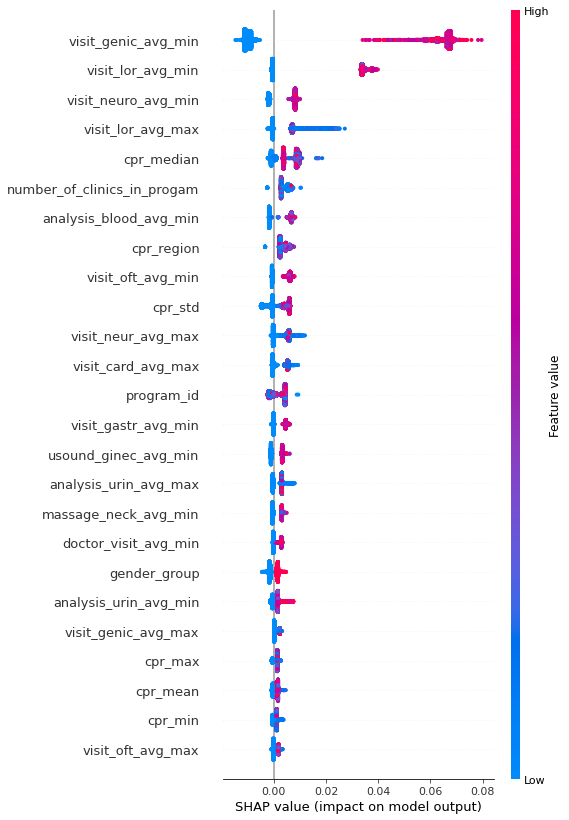

In [19]:
import shap

shap_test = shap.TreeExplainer(model).shap_values(data)
shap.summary_plot(shap_test, data,
                      max_display=25, auto_size_plot=True)